## Disclaimer:
The dataset may have some minor modifications for educational purposes.

This image data contains around 25k images of size 150x150 distributed under 6 categories. All images are divided into 6 classes:

- {'buildings' -> 0,  
  'forest' -> 1,  
  'glacier' -> 2,  
  'mountain' -> 3,  
  'sea' -> 4,  
  'street' -> 5 }

The Train, Test, and Prediction data is separated in each zip file. There are around 14k images in Train, 3k in Test, and 7k in Prediction.

Dataset can be found here.

### You are asked to train a model with the following steps:
1. Download data and get familiarized with it.
2. Normalize and preprocess data.
3. Visualize a batch of training data.
4. Specify Loss Function and Optimizer.
5. Train the Model.
6. Load the model with the lowest validation loss.
7. Test the trained network.
8. Create a subfolder containing all the unlabeled images in `seg_pred` to make PyTorch's `ImageFolder` work.

---

### Complete Homework with the following steps:
1. Name your final Homework Script as **“Landscape-Classification”**.
2. Create a repository named **“ConvNet-Architecture”** in your GitHub account and push your Homework Script to this repository.
3. Fork other users’ repositories, make pull requests (at least one, making three pull requests is desirable).

**Note**: Your pull requests should either fix problems or add new features.

## Məlumat:
Dataset təhsil məqsədləri üçün kiçik dəyişikliklərə malik ola bilər.

Bu şəkil məlumatları təxminən 25k, hər biri 150x150 ölçüdə olan şəkilləri ehtiva edir və 6 kateqoriyaya bölünür. Bütün şəkillər aşağıdakı 6 sinfə ayrılmışdır:

- {'buildings' -> 0,  
  'forest' -> 1,  
  'glacier' -> 2,  
  'mountain' -> 3,  
  'sea' -> 4,  
  'street' -> 5 }

Təlim, Test və Proqnoz məlumatları hər biri ayrıca zip faylda verilib. Təlimdə təxminən 14k, Testdə 3k və Proqnozda 7k şəkil var.

Dataseti buradan əldə edə bilərsiniz.

### Aşağıdakı addımlarla model qurmağınız tələb olunur:
1. Məlumatları yükləyin və onunla tanış olun.
2. Məlumatları normallaşdırın və əvvəlcədən emal edin.
3. Təlim məlumatlarından bir batch-i vizuallaşdırın.
4. Zərər Funksiyasını və Optimizatoru təyin edin.
5. Modeli təlim edin.
6. Ən aşağı validasiya zərəri ilə modeli yükləyin.
7. Təlim edilmiş şəbəkəni test edin.
8. `seg_pred` içərisindəki bütün etiketlənməmiş şəkilləri bir alt qovluğa yığın ki, PyTorch-un `ImageFolder` funksiyası ilə işləyə bilsin.

---

### Tapşırığın Tamamlanması Üçün Təlimatlar:
1. Son tapşırıq skriptinizi **“Landscape-Classification”** olaraq adlandırın.
2. GitHub hesabınızda **“ConvNet-Architecture”** adlı bir repository yaradın və tapşırıq skriptinizi bu repositoriyə yükləyin.
3. Başqa istifadəçilərin repositorilərini forklayın, pull request göndərin (ən azı bir, tercihen üç pull request etmək arzuolunandır).

**Qeyd**: Sizin pull request-ləriniz ya problemləri həll etməli, ya da yeni funksiyalar əlavə etməlidir.

In [1]:
# !pip install kagglehub

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(r"huseynguliyev/landscape-classification")

print("Path to dataset files:", path)

100%|██████████| 121M/121M [00:06<00:00, 18.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/huseynguliyev/landscape-classification/versions/1


In [2]:
# for root, dirs, files in os.walk(path):
#     print("Root:", root)
#     print("Dirs:", dirs)
#     print("Files:", files)

### Plot Pictures

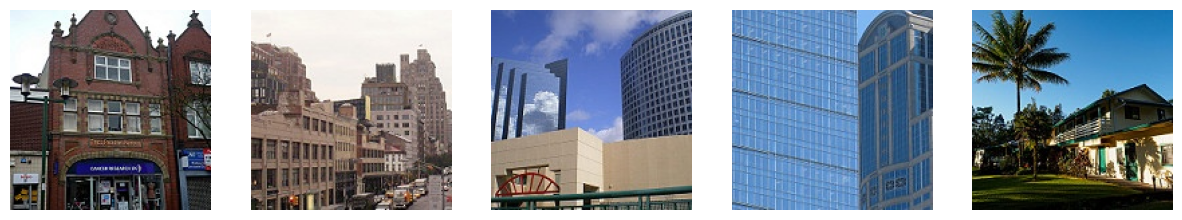

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Datasetin əsas yolunu göstəririk
data_path = os.path.join(path, "intel-image-classification/train")

# Şəkilləri yükləyəcəyimiz sinifi seçirik (məsələn, "buildings")
category = 'buildings'  # Burada kateqoriyanı dəyişə bilərsiniz
image_folder = os.path.join(data_path, category)

# İlk 5 şəkili yükləyirik
image_files = os.listdir(image_folder)[:5]  # İlk 5 şəkil

# Şəkilləri göstəririk
plt.figure(figsize=(15, 10))  # Şəkillərin ölçüsünü təyin edirik
for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)

    # Şəkli subplot-da göstəririk
    plt.subplot(1, 5, i + 1)  # 1 sıra və 5 sütunlu subplot
    plt.imshow(image)
    plt.axis('off')

plt.show()

### datanin qovluqlari ve yeri


### dataset/
####    train/
-        buildings/
-        forest/
-        glacier/
-        mountain/
-        sea/
-        street/
####    validation/
-        buildings/
-        forest/
-        glacier/
-        mountain/
-        sea/
-        street/


### Train vs Test Data Preperation

In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Datasetin kök yolu
train_dir = path + "/intel-image-classification/train"
test_dir = path + "/intel-image-classification/validation"

# Hər iki set üçün transformasiyalar (resize, normalize və s.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # CNN üçün ölçünü uyğunlaşdırırıq
    transforms.ToTensor(),  # Tensor formatına çeviririk
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pretrained model üçün
])

# Datasetin yüklənməsi
# ImageFolder avtomatik her qovluqda olan sekillere qovluq adina uygun label teyin edir
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# DataLoader-ların yaradılması
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Datasetin label-ləri (bu adlar sırasına görə etiketlənəcək)
class_names = train_dataset.classes
print("Class names:", class_names)

# Dataset ölçüləri
print("Train set size:", len(train_dataset))
print("Test set size:", len(test_dataset))

Class names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Train set size: 6000
Test set size: 2400


### Hər dövr üçün alınan 'images' tensorunun ölçülərini

In [17]:
# train_loader-dən görüntü və etiketləri əldə etmək üçün dövr yaradırıq
for images, labels in train_loader:
    # Hər dövr üçün alınan 'images' tensorunun ölçülərini çap edirik
    print(images.shape)
    # İlk dövrün sonunda dövrü dayandırırıq, çünki yalnız bir partiya (batch) göstərmək istəyirik
    break

torch.Size([32, 3, 224, 224])


### Use Ready Model Resnet18

In [5]:
import torch
import torch.nn as nn
from torchvision.models import ResNet18_Weights
import torchvision.models as models

# Modelin yüklənməsi (ResNet18 misalı)
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Son təbəqəni dəyişirik (fully connected layer)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))  # `len(class_names)` bizim etiket sayı olacaq

# Modeli cihazınıza (GPU/CPU) yükləyin
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Modelin strukturu
print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 184MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### CrossEntropyLoss vs Adam Optimzation vs Train Stage

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Optimizer və Loss funksiyası
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Modelin təlimi
epochs = 10  # Təlim dövr sayını təyin edin
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Optimizerın grad-larını sıfırlayırıq
        outputs = model(images)
        loss = criterion(outputs, labels)  # Hədəf və modelin çıxışı arasındakı itki
        loss.backward()  # Grad-ları geri yayırıq
        optimizer.step()  # Optimizer bir addım irəliləyir

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

Epoch [1/10], Loss: 0.4149, Accuracy: 86.07%
Epoch [2/10], Loss: 0.3266, Accuracy: 88.78%
Epoch [3/10], Loss: 0.2565, Accuracy: 91.17%
Epoch [4/10], Loss: 0.2233, Accuracy: 92.30%
Epoch [5/10], Loss: 0.1999, Accuracy: 92.87%
Epoch [6/10], Loss: 0.1448, Accuracy: 94.92%
Epoch [7/10], Loss: 0.1434, Accuracy: 94.95%
Epoch [8/10], Loss: 0.1081, Accuracy: 96.60%
Epoch [9/10], Loss: 0.0862, Accuracy: 97.10%
Epoch [10/10], Loss: 0.0716, Accuracy: 97.60%


### Evolution stage

In [15]:
model.eval()  # Modeli qiymətləndirmə rejiminə keçiririk
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct/total:.2f}%")

Validation Accuracy: 89.62%


### Metrics

In [16]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score,\
                                                                                                    confusion_matrix

model.eval() # Modeli qiymətləndirmə rejiminə keçirir
all_labels = [] # Test dəstindəki həqiqi etiketləri saxlamaq üçün boş siyahı
all_predictions = [] # Modelin təxmin etdiyi etiketləri saxlamaq üçün boş siyahı

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images) # Test məlumatlarını modeldən keçirir
        _, predicted = torch.max(outputs, 1) # Hər bir nümunə üçün ehtimalı ən yüksək olan sinifi seçir
        all_labels.extend(labels.cpu().numpy()) # Həqiqi etiketləri siyahıya əlavə edir
        all_predictions.extend(predicted.cpu().numpy()) # Təxminləri siyahıya əlavə edir

# Metrikləri hesablamaq
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(all_labels, all_predictions))

Accuracy: 89.62%
F1 Score: 0.90
Recall: 0.90
Precision: 0.90
Confusion Matrix:
 [[342   2   5   0   4  47]
 [  0 388   6   1   2   3]
 [  4   1 346  39   9   1]
 [  1   1  47 332  17   2]
 [  0   1  24   8 366   1]
 [ 14   0   3   1   5 377]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       400
           1       0.99      0.97      0.98       400
           2       0.80      0.86      0.83       400
           3       0.87      0.83      0.85       400
           4       0.91      0.92      0.91       400
           5       0.87      0.94      0.91       400

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



### Sekili komputerden Colab-a yuklemek methodu

In [32]:
from google.colab import files
uploaded = files.upload()

Saving street.jpg to street (1).jpg


### Forecast

In [37]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# FashionMNIST sinif adları
class_names = train_dataset.classes

# Şəkli yükləyin və modelin gözlədiyi ölçüyə və formata çevirin
image_path = r'street.jpg'
image = Image.open(image_path).convert("RGB")  # 3 kanal (RGB) formatına çevir

# Transformasiyanı tətbiq et
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Modelin gözlədiyi ölçüyə çevirir
    transforms.ToTensor(),          # Tensora çevirir
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizasiya (pretrained model üçün)
])

# Şəkli tensora çevir və batch ölçüsünü (1, 3, 224, 224) kimi göstər
image_tensor = transform(image).unsqueeze(0)  # Batch ölçüsünü əlavə edirik (1, 3, 224, 224)

# Cihaza göndəririk (GPU və ya CPU)
image_tensor = image_tensor.to(device)

# Modeli qiymətləndirmək (eval mode)
model.eval()

# Modelin proqnozunu alın
with torch.no_grad():
    output = model(image_tensor)  # Şəkli modeldən keçiririk
    _, predicted_class = torch.max(output, 1)  # Ehtimalı ən yüksək olan sinifi seçirik

# Proqnoz nəticəsini sinif adı ilə göstər
predicted_class_name = class_names[predicted_class.item()]
print(f"Modelin proqnozu: Sinif: {predicted_class.item()} ; Adı: {predicted_class_name}")

Modelin proqnozu: Sinif: 5 ; Adı: street


### Check Forecast

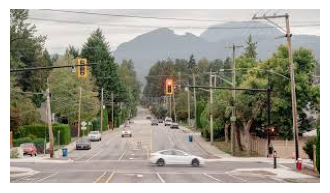

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

# Şəkili açın və göstərmək üçün plt.imshow funksiyasına verin
image_path = r"street.jpg"
image = Image.open(image_path)

plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis("off")  # Oxları gizlətmək üçün
plt.show()